# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [98]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [99]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [100]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [101]:
# Shape
df_dsa.shape

(9700, 11)

In [102]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [103]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [104]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [105]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [106]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [107]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [108]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [109]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [110]:
#filtrando data frame
df_dsa_p1 = df_dsa[df_dsa["Categoria"] == "Office Supplies"]
#agrupamos por cidade e calculamos o total valor de venda
df_dsa_p1_total = df_dsa_p1.groupby("Cidade")["Valor_Venda"].sum()

cidade_maior_valor = df_dsa_p1_total.idxmax()
print("A cidade com maior valor é :",cidade_maior_valor)

A cidade com maior valor é : New York City


In [111]:
#para conferir
df_dsa_p1_total.sort_values(ascending= False)#ordenar valores, crescente = falso

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [112]:
df_dsa_p2 = df_dsa.groupby("Data_Pedido")["Valor_Venda"].sum()

print(df_dsa_p2.head())


Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64


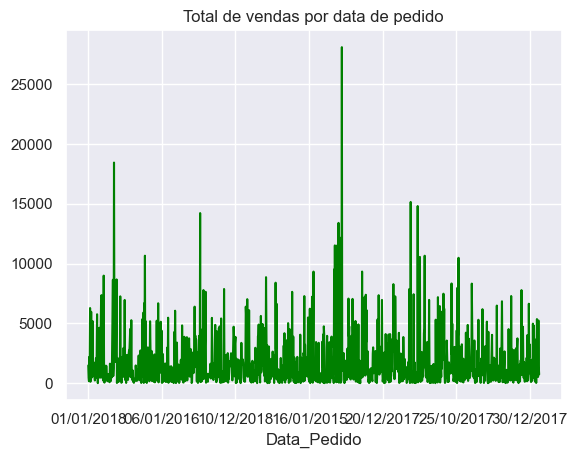

In [113]:
#gráfico

plt.Figure(figsize=(20,6))
df_dsa_p2.plot(x = "Data_pedido", y = "Valor_Vendo", color = "green")
plt.title("Total de vendas por data de pedido")
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [114]:
df_dsa_p3 = df_dsa.groupby("Estado")["Valor_Venda"].sum().reset_index()
df_dsa_p3

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


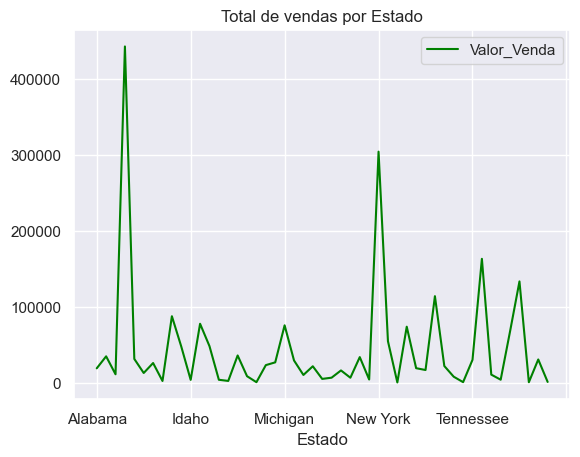

In [115]:
#gráfico

plt.Figure(figsize=(200,200))
df_dsa_p3.plot(x = "Estado", y = "Valor_Venda", color = "green")
plt.title("Total de vendas por Estado")
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [116]:
df_dsa_p4 = df_dsa.groupby("Cidade")["Valor_Venda"].sum().nlargest(10).reset_index()
#nlargest = retorna os maiores valores
df_dsa_p4.head(10)

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


<Figure size 1000x600 with 0 Axes>

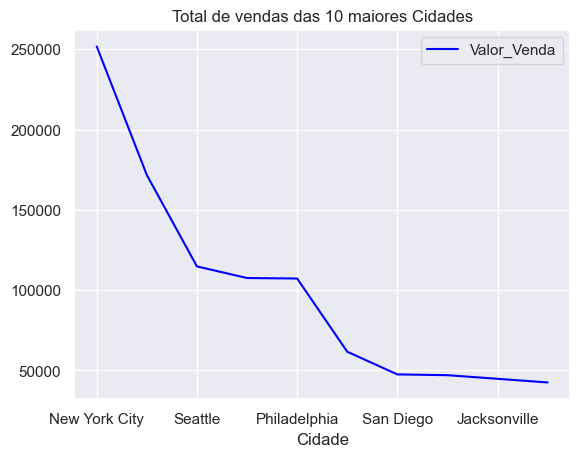

In [117]:
#grafico
plt.figure(figsize=(10,6))
df_dsa_p4.plot(x = "Cidade", y = "Valor_Venda", color="blue")
plt.title("Total de vendas das 10 maiores Cidades")
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [118]:
df_dsa_p5 = df_dsa.groupby("Segmento")["Valor_Venda"].sum().reset_index().sort_values(by="Valor_Venda",ascending=False)
#sort=organizar

df_dsa_p5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


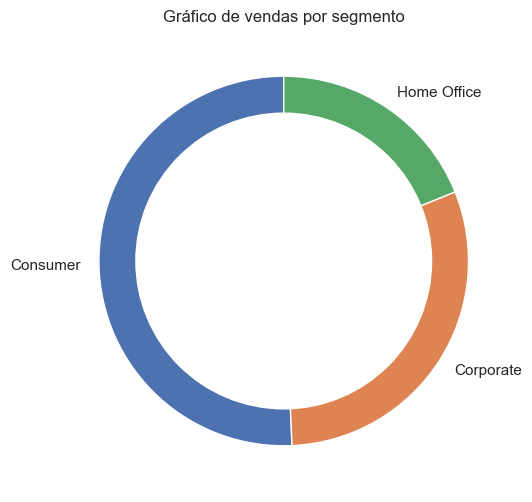

In [119]:
#gráfico



plt.figure(figsize=(10, 6))

plt.pie(df_dsa_p5["Valor_Venda"],
        labels=df_dsa_p5["Segmento"],
        startangle=90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.8, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.title("Gráfico de vendas por segmento")
plt.show()


## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [120]:
#convertendo data para tipo datetime
df_dsa["Data_Pedido"] = pd.to_datetime(df_dsa["Data_Pedido"], dayfirst=True)


In [121]:
df_dsa["Ano"] = df_dsa["Data_Pedido"].dt.year

In [122]:
df_dsa.head(2)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94,2017


In [123]:
df_dsa_p6 = df_dsa.groupby(["Ano","Segmento"])["Valor_Venda"].sum().reset_index()
df_dsa_p6

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [124]:
#A função numpy.where() é usada para retornar elementos de um array, dependendo de uma determinada condição. 

df_dsa["Desconto"] = np.where(df_dsa["Valor_Venda"] > 1000, 0.15, 0.10)

df_dsa.head()

df_dsa["Desconto"].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [125]:
df_dsa["Valor_Venda_Desconto"] = df_dsa["Valor_Venda"] - (df_dsa["Valor_Venda"] * df_dsa["Desconto"])

#df_dsa.head()
#Em resumo, o .loc[] é usado para acessar, selecionar e filtrar dados em um DataFrame ou Series com base em rótulos de linhas e colunas.
#cria uma lista, com os valor_venda a qual desconto é == 0.15,
df_dsa_p8_antes_desconto = df_dsa.loc[df_dsa["Desconto"] == 0.15, "Valor_Venda"]

df_dsa_p8_depois_desconto = df_dsa.loc[df_dsa["Desconto"] == 0.15, "Valor_Venda_Desconto"]

media_depois_desconto = df_dsa_p8_depois_desconto.mean()

media_antes_desconto = df_dsa_p8_antes_desconto.mean()

print("Antes do desconto",media_antes_desconto)
print("Depois do desconte",media_depois_desconto)

Antes do desconto 2116.8078153172864
Depois do desconte 1799.2866430196934


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

<Figure size 1200x600 with 0 Axes>

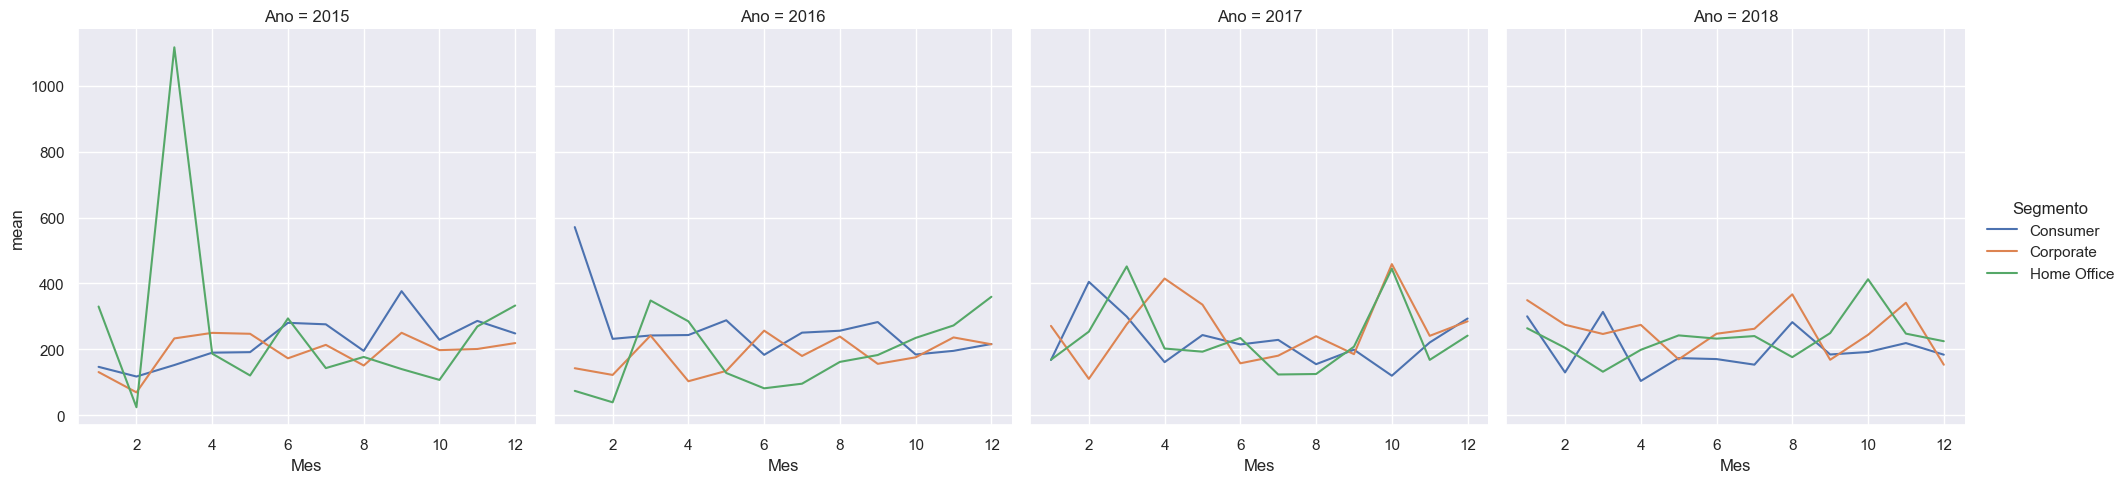

In [131]:
df_dsa["Mes"] = df_dsa["Data_Pedido"].dt.month

df_dsa_p9 = df_dsa.groupby(["Ano","Mes","Segmento"])["Valor_Venda"].agg([np.sum,np.mean,np.median])

#df_dsa_p9

Ano = df_dsa_p9.index.get_level_values(0)
Mes = df_dsa_p9.index.get_level_values(1)
Segmento = df_dsa_p9.index.get_level_values(2)



# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_dsa_p9, 
                   y = "mean", 
                   x = Mes,
                   hue = Segmento, 
                   col = Ano,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [132]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [150]:
from pickle import FALSE
from unicodedata import numeric

#sort = organizar
df_dsa_p10 = df_dsa.groupby(["Categoria","SubCategoria"]).sum(numeric_only=True).sort_values("Valor_Venda",ascending=False).head(12)

#astype = converte para int
df_dsa_p10 = df_dsa_p10[["Valor_Venda"]].astype(int).sort_values(by = "Categoria").reset_index()

df_dsa_p10

#df_dsa_p10_cat = df_dsa_p10.groupby(["Categoria"]).sum(numeric_only=True).reset_index()
#df_dsa_p10_cat

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


# Fim